In [1]:
import sympy as sy
from sympy import init_printing
init_printing()

In [22]:
a1,b1,c1,d1 = sy.symbols('a1 b1 c1 d1',commutative=False)
a2,b2,c2,d2 = sy.symbols('a2 b2 c2 d2',commutative=False)
A1 = sy.Matrix([[a1,b1],[c1,d1]])
A2 = sy.Matrix([[a2,b2],[c2,d2]])

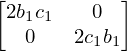

In [29]:
super_transpose(super_bracket(A1,A2))

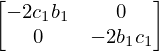

In [30]:
B1,B2 = super_transpose(A1),super_transpose(A2)
csuper_bracket(B1,B2)

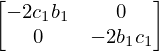

In [32]:
c = super_bracket(B1,B2)
c.T

In [15]:
def decompose(A,even=1):
    '''将矩阵分解为奇偶部分'''
    m,n = A.shape
    assert m==n, '输入不为方阵'
    A_even = sy.zeros(m)
    A_even[:even,:even] = A[:even,:even]
    A_even[even:,even:] = A[even:,even:]
    A_odd = sy.zeros(m)
    A_odd[:even,even:] = A[:even,even:]
    A_odd[even:,:even] = A[even:,:even]
    return A_even,A_odd

In [27]:
lie_bracket = lambda A,B:A*B-B*A
def super_bracket(A,B,even=1):
    '''李超括号，偶部分数目为even'''
    assert A.shape == B.shape, '矩阵大小不一致'
    A_even, A_odd = decompose(A,even=even)
    B_even, B_odd = decompose(A,even=even)
    
    M = (A_odd*B_odd + B_odd*A_odd) + lie_bracket(A_even,B_even) \
        + lie_bracket(A_odd,B_even) + lie_bracket(A_even,B_odd)
    return M

def super_transpose(A,even=1):
    '''超转置'''
    A_even,A_odd = decompose(A)
    A_even = A_even.T
    A_odd[:even,even:] = -A_odd[:even,even:]
    A_odd = A_odd.T
    return A_odd+A_even